In [ ]:
# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


In [1]:
doc"""
derivada_derecha(f,h,x0)

Esta función calcula la derivada derecha de una función utilizando la expresión:

\$f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h}\$

Su estructura es la siguiente:

derivada_derecha([función],[h],[x0])

Por defecto \$x_0=0.0\$

"""

function derivada_derecha(f,h,x0 = 0.0)
    # código
    num=f(x0+h)-f(x0) #Numerador
    deno=h            #Denominador
    
    derivada=num/deno
    
    return derivada 
    
end

derivada_derecha

In [2]:
methods(derivada_derecha)

# 2 methods for generic function "derivada_derecha":
derivada_derecha(f, h) at In[1]:18
derivada_derecha(f, h, x0) at In[1]:18

In [3]:
?derivada_derecha

search:



derivada_derecha(f,h,x0)

Esta función calcula la derivada derecha de una función utilizando la expresión:

$f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h}$

Su estructura es la siguiente:

derivada_derecha([función],[h],[x0])

Por defecto $x_0=0.0$


In [4]:
#Función a evaluar
function f(x)
    return 3x^3-2
end

f (generic function with 1 method)

Cálculo analítico de la derivada

Aplicando la fórmula para la derivada a la función $f(x)=3x³-2$ con $x_0=1$ tenemos: $\lim_{h \to 0} \frac{(3(x_0+h)³-2)-(3x_0³-2)}{h} = \lim_{h \to 0} \frac{(3(h³+3h²x_0+3hx_0²+x_0³)-2)-(3x_0³-2)}{h}=\lim_{h \to 0}  \frac{(3h³+9h²x_0+9hx_0²+3x_0³-2)-(3x_0³-2)}{h} = \lim_{h \to 0} \frac{3h³+9h²x_0+9hx_0²+3x_0³-2-3x_0³+2}{h}=\lim_{h \to 0}  \frac{3h³+9h²x_0+9hx_0²}{h}=\lim_{h \to 0} \frac{h(3h²+9hx_0+9x_0²)}{h} =\lim_{h \to 0}  (3h²+9hx_0+9x_0²) =9x_0²$ 
como $x_0=1$ entonces $\lim_{h \to 0} \frac{(3(x_0+h)³-2)-(3x_0³-2)}{h} =9$

In [5]:
deri=derivada_derecha(f,0.00000000001,1.0)

9.000000744663339

Cálculo del error absoluto

In [6]:
Error_absoluto=abs(deri-9)

7.446633389918134e-7

Generamos un vector con los valores de h con valores aleatorios en el intervalo [0,1]. 

In [7]:
vector_h=logspace(-14,0,1000)

1000-element Array{Float64,1}:
 1.0e-14    
 1.03279e-14
 1.06666e-14
 1.10165e-14
 1.13777e-14
 1.17509e-14
 1.21362e-14
 1.25342e-14
 1.29453e-14
 1.33698e-14
 1.38083e-14
 1.42611e-14
 1.47288e-14
 ⋮          
 0.701206   
 0.724202   
 0.747952   
 0.772481   
 0.797814   
 0.823979   
 0.851001   
 0.878909   
 0.907733   
 0.937502   
 0.968247   
 1.0        

In [8]:
len=length(vector_h) #Cantidad de valores de h
error=[] #Vector vacio que será llenado con los valores de error para cada h.
#der=[]
for i=1:len
    
   derivadas=derivada_derecha(f,vector_h[i],1.0)#Valor de la derivada para cada h.
    
    Error_absoluto=abs(derivadas-9)#Valor del error para cada derivada. 
    #println(i,"\t",Error_absoluto)
    #println(i,"\t",derivadas)
    #push!(der,derivadas)
    push!(error,Error_absoluto)#Agregamos los valores de error obtenidos al vector. 
    
end

In [9]:
error

1000-element Array{Any,1}:
  0.029398 
  0.115743 
  0.0071791
  0.0700712
  0.0227773
  0.0054983
  0.0748158
  0.07162  
  0.0463809
  0.0317468
  0.0270699
  0.0317325
  0.0451461
  ⋮        
  7.78593  
  8.09123  
  8.40987  
  8.74251  
  9.08985  
  9.45263  
  9.83161  
 10.2276   
 10.6415   
 11.0742   
 11.5267   
 12.0      

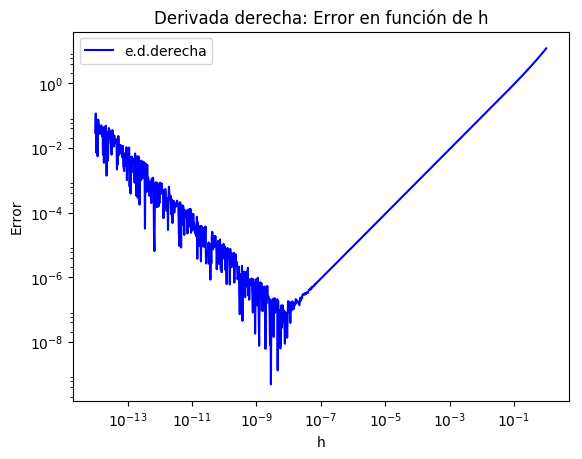

In [10]:
using PyPlot

plot(vector_h,error, color="blue",label= "e.d.derecha")#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas)
xlabel("h") #Etiqueta para el eje X
ylabel("Error")#Etiqueta para el eje Y
title("Derivada derecha: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

legend(loc="best")#Muestra la leyenda y con loc="best" la ubica en una posición adecuada.
show()




Cuando $h$ toma valores mayores a $1X10^-7$ el error disminuye de confome es $h$ más pequeña. Sin embago, cuando toma valores menores a $1x10^-7$, el error aumenta y disminuye para valores de $h$ muy cercanos. El error no está acotado conforme $h$ toma valores menores a $1X10^-7$. 

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [11]:
doc"""
derivada_simetrica(f,h,x_0)

Esta función calcula la derivada simetrica de una función utilizando la expresión:

\$f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}\$

Su estructura es la siguiente:

derivada_simetrica([función],[h],[x0])

Por defecto \$x_0=0.0\$

"""

function derivada_simetrica(f,h,x0 = 0.0)
    
    num=f(x0+h)-f(x0-h)
    deno=2*h
    
    derivada=num/deno
    
    return derivada 
    
end

derivada_simetrica

In [12]:
?derivada_simetrica

search:



derivada_simetrica(f,h,x_0)

Esta función calcula la derivada simetrica de una función utilizando la expresión:

$f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}$

Su estructura es la siguiente:

derivada_simetrica([función],[h],[x0])

Por defecto $x_0=0.0$


In [13]:
derivada_simetrica(f,0.00000000001,1.0)

9.000000744663339

In [14]:
error_2=[]#Vector vacio que será llenado con los valores de error para cada h.

for i=1:len
    
   derivadas_2=derivada_simetrica(f,vector_h[i],1.0)#Valor de la derivada para cada h.
    
    Error_absoluto_2=abs(derivadas_2-9)#Valor del error para cada derivada. 

    push!(error_2,Error_absoluto_2)#Agregamos los valores de error obtenidos al vector. 
    
end

In [15]:
error_2

1000-element Array{Any,1}:
 0.029398 
 0.0512447
 0.0071791
 0.0297598
 0.0227773
 0.0054983
 0.0199278
 0.03619  
 0.0120758
 0.0317468
 0.0270699
 0.0317325
 0.0149951
 ⋮        
 1.47507  
 1.57341  
 1.6783   
 1.79018  
 1.90952  
 2.03682  
 2.17261  
 2.31744  
 2.47194  
 2.63673  
 2.8125   
 3.0      

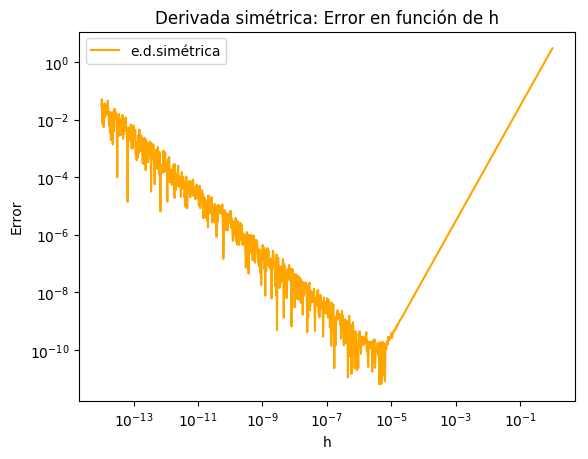

In [16]:
using PyPlot

plot(vector_h,error_2, color="orange", label = "e.d.simétrica")#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas_2)
xlabel("h") #Etiqueta para el eje X
ylabel("Error") #Etiqueta para el eje Y
title("Derivada simétrica: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

legend(loc="best")#Muestra la leyenda y con loc="best" la ubica en una posición adecuada.
show()


El comportamiento del error depende del intervalo en el que se encuentre $h$. De manera similar al caso de la derivada simétrica, el error disminuye de confome $h$ es más pequeña esto, mientras $h$ tome valores mayores a $1X10^-5$, pues para valores menores a $1x10^-5$ el error aumenta y disminuye para valores de $h$ muy cercanos. El error no está acotado conforme $h$ toma valores menores a $1X10^-5$. 

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [17]:
doc"""
derivada_compleja(f,h,x0)

Esta función calcula la derivada compleja de una función utilizando la expresión:

\$f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big)\$

Su estructura es la siguiente:

derivada_compleja([función],[h],[x0])

Por defecto \$x_0=0.0\$

Sólo se muestra la parte imaginaria del resultado.
"""

function derivada_compleja(f,h,x0 = 0.0)
    
    num=f(x0+h*im)
    deno=h
    
    derivada=num/deno
    
    return imag(derivada) #Sólo se muestra la parte imaginaria del resultado.
    
end

derivada_compleja

In [18]:
?derivada_compleja

search:



derivada_compleja(f,h,x0)

Esta función calcula la derivada compleja de una función utilizando la expresión:

$f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big)$

Su estructura es la siguiente:

derivada_compleja([función],[h],[x0])

Por defecto $x_0=0.0$

Sólo se muestra la parte imaginaria del resultado.


In [19]:
derivada_compleja(f,0.00000000001,1.0)

9.0

In [20]:
error_3=[]#Vector vacio que será llenado con los valores de error para cada h.

for i=1:len
    
   derivadas_3=derivada_compleja(f,vector_h[i],1.0)#Valor de la derivada para cada h.
    
    Error_absoluto_3=abs(derivadas_3-9)#Valor del error para cada derivada. 

    push!(error_3,Error_absoluto_3)#Agregamos los valores de error obtenidos al vector. 
    
end

In [21]:
error_3

1000-element Array{Any,1}:
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 ⋮      
 1.47507
 1.57341
 1.6783 
 1.79018
 1.90952
 2.03682
 2.17261
 2.31744
 2.47194
 2.63673
 2.8125 
 3.0    

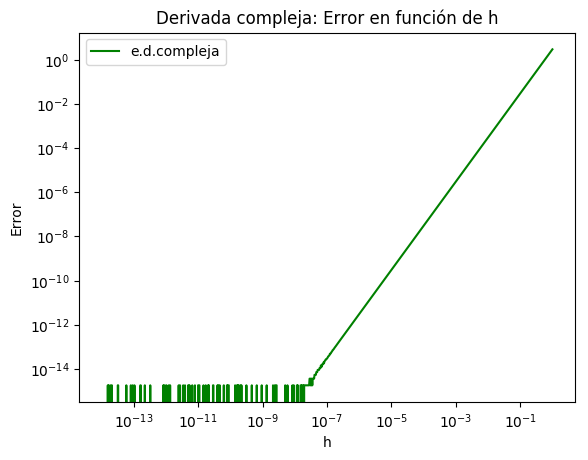

In [22]:
using PyPlot

plot(vector_h,error_3,color="green",label = "e.d.compleja")#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas_2)
xlabel("h") #Etiqueta para el eje X
ylabel("Error") #Etiqueta para el eje Y
title("Derivada compleja: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

legend(loc="best")#Muestra la leyenda y con loc="best" la ubica en una posición adecuada.

show()

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

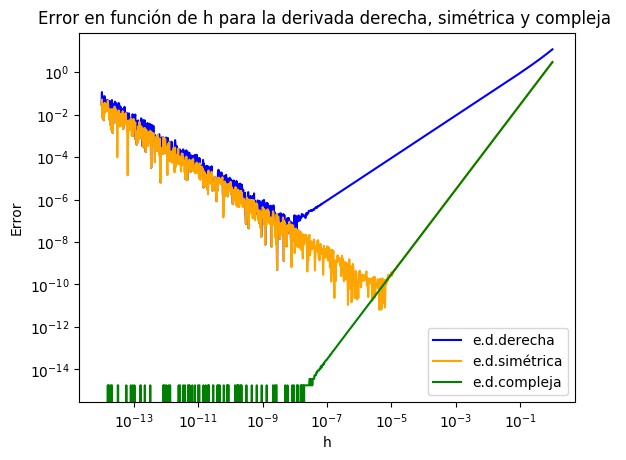

In [23]:
using PyPlot
plot(vector_h, error, color = "blue",label= "e.d.derecha")#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
plot(vector_h, error_2, color = "orange",label= "e.d.simétrica")
plot(vector_h, error_3, color = "green",label= "e.d.compleja")
#plot(vector_h,derivadas_2)
xlabel("h") #Etiqueta para el eje X
ylabel("Error") #Etiqueta para el eje Y
title("Error en función de h para la derivada derecha, simétrica y compleja ")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

legend(loc="best")#Muestra la leyenda y con loc="best" la ubica en una posición adecuada.   

show()

Como podemos ver en la gráfica anterior, en las tres definiciones, para cierto intervalo la pendiente es positiva, es decir, el error decrece conforme h disminuye y luego llega a un valor mínimo, que se traduce el valor más exacto de la derivada que te puede dar la definición y al final, en el caso de la derivada derecha y simétrica, la pendiente es nuevamente distinta de cero haciendo que el error aumente (es inversamente proporcional a h). En cuanto a la derivada compleja el error queda acotado después de llegar al punto donde la derivada es más exacta, por lo cual podríamos decir que a partir de ese punto, "globalmente" la pendiente no cambia, esto debido a que al manejar números de punto flotante y, dado que el error disminuye, las diferencias entre un error y el siguiente son práctiamente cero. De lo anterior podemos concluir que la definición de la derivada compleja nos da una mejor aproximación al valor de la derivada, ya que, antes de llegar a $1X10^-7$ el error disminuye con forme $h$ se hace más pequeña. En este aspecto, da un mejor resultado en comparación con la derivada derecha y simétrica pues alcanza valores de error menores. Por otro lado, cuando h es menor a $1X10^-7$, el error no aumenta, sino que se mantiene acotado. Además la definición de la derivada compleja no implica relaciones de diferencia, las cuales podrían  producir errores de cancelación al restar cantidades muy próximas, provocando la pérdida de cifras significativas correctas en el resultado.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?

Que el error no disminuya siempre que disminuya h. En el caso de la derivada derecha y la simétrica, esto puede atribuirse al error de cancelación ya que  $f(x+h)\approx f(x)$ cuando $h$ es muy pequeña, provocando la pérdida de cifras significativas, lo cual se traduce un aumento en el error. 